<a href="https://colab.research.google.com/github/sallape/AI-Public/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
from sklearn import datasets
from sklearn.datasets import load_digits

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
digits = load_digits()

In [5]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
len(digits.images)

1797

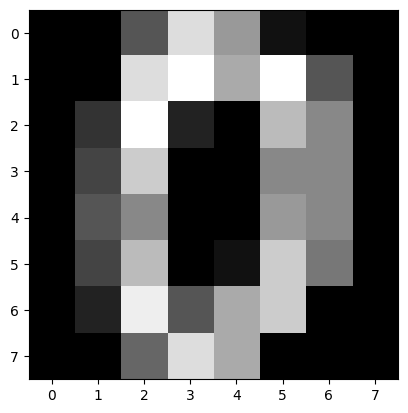

In [7]:
plt.imshow(digits.images[0],cmap='gray')

In [8]:
data1 = pd.DataFrame(digits.data)

In [9]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
data1.count()

,0
0,1797
1,1797
2,1797
3,1797
4,1797
...,...
59,1797
60,1797
61,1797
62,1797


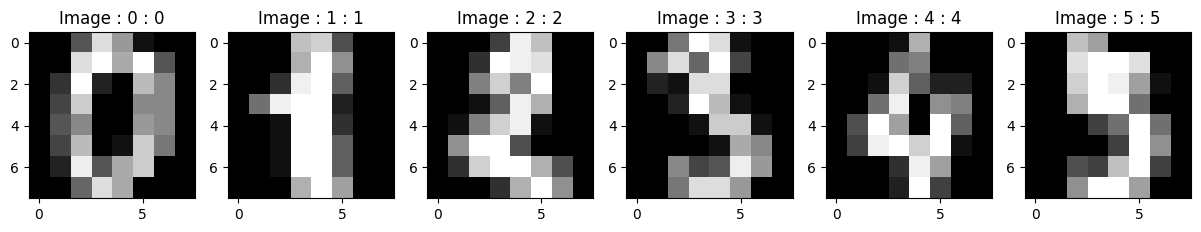

In [12]:
plt.figure(figsize=(15,4))
for index,(image,label) in enumerate(zip(digits.images[0:6],digits.target[0:6])):
  plt.subplot(1,6,index+1)
  plt.imshow(np.reshape(image,(8,8)),cmap='gray')
  plt.title(f'Image : {label} : {index}')

In [14]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1797.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,1797.0,0.303840,0.907192,0.0,0.0,0.0,0.0,8.0
2,1797.0,5.204786,4.754826,0.0,1.0,4.0,9.0,16.0
3,1797.0,11.835838,4.248842,0.0,10.0,13.0,15.0,16.0
4,1797.0,11.848080,4.287388,0.0,10.0,13.0,15.0,16.0
...,...,...,...,...,...,...,...,...
59,1797.0,12.089037,4.374694,0.0,11.0,13.0,16.0,16.0
60,1797.0,11.809126,4.933947,0.0,10.0,14.0,16.0,16.0
61,1797.0,6.764051,5.900623,0.0,0.0,6.0,12.0,16.0
62,1797.0,2.067891,4.090548,0.0,0.0,0.0,2.0,16.0


In [15]:
data1.shape

(1797, 64)

In [24]:
x = digits.data
y = digits.target

In [27]:
from sklearn.preprocessing import StandardScaler

In [29]:
X_std = StandardScaler().fit_transform(x)

In [30]:
X_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [31]:
x1=X_std.T

In [33]:
cov_mat = np.cov(x1)

In [36]:
eig_val,eig_vec = np.linalg.eig(cov_mat)

In [37]:
len(eig_vec)

64

In [38]:
tot = sum(eig_val)
var_exp = [(i/tot)*100 for i in sorted(eig_val,reverse=1)] # individual explained variance

In [39]:
cuv_exp_var = np.cumsum(var_exp)

[]

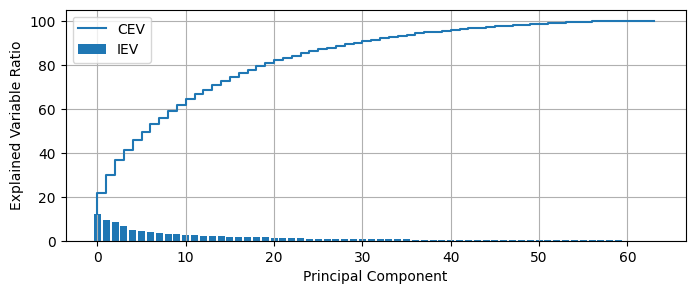

In [40]:
plt.figure(figsize=(8,3))
plt.bar(range(len(cuv_exp_var)),var_exp,label='IEV')
plt.step(range(len(cuv_exp_var)),cuv_exp_var,label='CEV')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variable Ratio')
plt.grid()
plt.legend()
plt.plot()

In [50]:
x_train,x_test,y_train,y_test = train_test_split(X_std,y,train_size=0.8)
pca = PCA(n_components=23)
pca_x_train=pca.fit_transform(x_train)
pca_x_test=pca.transform(x_test)

In [51]:
dtc = DecisionTreeClassifier().fit(pca_x_train,y_train)
predict = dtc.predict(pca_x_test)

In [52]:
predict

array([5, 0, 4, 8, 4, 3, 6, 1, 5, 4, 7, 3, 5, 5, 3, 8, 1, 1, 5, 7, 0, 1,
       2, 5, 9, 1, 8, 8, 1, 9, 7, 3, 9, 6, 5, 1, 2, 1, 9, 1, 2, 7, 9, 4,
       2, 3, 7, 1, 0, 0, 3, 2, 8, 3, 3, 5, 7, 0, 4, 1, 2, 7, 6, 3, 3, 4,
       9, 1, 8, 5, 7, 4, 1, 0, 4, 0, 3, 8, 6, 4, 2, 8, 9, 0, 9, 3, 9, 4,
       3, 6, 2, 0, 0, 5, 8, 3, 9, 1, 8, 4, 1, 4, 6, 6, 1, 9, 1, 4, 5, 7,
       0, 1, 1, 5, 5, 4, 2, 1, 6, 8, 3, 0, 5, 5, 3, 0, 7, 2, 9, 2, 6, 4,
       6, 4, 2, 7, 6, 0, 8, 8, 6, 1, 0, 6, 5, 9, 8, 4, 0, 6, 0, 6, 2, 3,
       9, 8, 3, 1, 0, 0, 9, 9, 0, 3, 1, 7, 9, 0, 3, 8, 5, 7, 2, 2, 6, 2,
       6, 7, 4, 1, 2, 6, 4, 0, 4, 7, 2, 1, 3, 4, 1, 3, 3, 4, 4, 7, 4, 8,
       8, 3, 9, 2, 7, 2, 7, 4, 6, 2, 6, 2, 6, 4, 1, 6, 6, 0, 3, 6, 8, 1,
       9, 2, 1, 5, 7, 5, 8, 3, 8, 6, 8, 1, 8, 6, 9, 0, 7, 3, 9, 4, 1, 1,
       5, 2, 7, 3, 0, 6, 3, 0, 2, 4, 1, 1, 8, 0, 3, 0, 4, 2, 7, 1, 5, 0,
       8, 6, 9, 6, 0, 5, 2, 4, 6, 4, 4, 7, 0, 9, 1, 2, 4, 2, 2, 5, 8, 8,
       8, 0, 7, 0, 5, 1, 7, 2, 2, 9, 6, 3, 7, 7, 6,

In [53]:
accuracy_score(predict,y_test)

0.8222222222222222